In [8]:
import torch
x = torch.rand(4, requires_grad=True)
w = torch.rand(4, requires_grad=True)
x, w

(tensor([0.6575, 0.6569, 0.3812, 0.6394], requires_grad=True),
 tensor([0.9144, 0.0785, 0.2668, 0.1235], requires_grad=True))

In [9]:
y = x @ w  # inner-product of x and w
z = y ** 2  # square the inner product
y, z

(tensor(0.8334, grad_fn=<DotBackward>), tensor(0.6946, grad_fn=<PowBackward0>))

In [10]:
z.backward()  # ask pytorch to trace back the computation of z
z

tensor(0.6946, grad_fn=<PowBackward0>)

In [11]:
w.grad  # the resulting gradient of z w.r.t w

tensor([1.0958, 1.0950, 0.6354, 1.0658])

In [13]:
# Note that this is exactly equals to the following
# since dz/dy = 2*y and dy/dw = x.
2*y*x

tensor([1.0958, 1.0950, 0.6354, 1.0658], grad_fn=<MulBackward0>)

In [16]:
# the resulting gradient of z w.r.t x
# As you can see, y and z stores not only the "forward" value of <x, w> or y**2 
# but also the computational graph -- the grad_fn that is needed to compute the derivatives
#  (using the chain rule) when tracing back the gradients from z (output) to w (inputs).
x.grad, 2*y*w

(tensor([1.5241, 0.1308, 0.4447, 0.2059]),
 tensor([1.5241, 0.1308, 0.4447, 0.2059], grad_fn=<MulBackward0>))

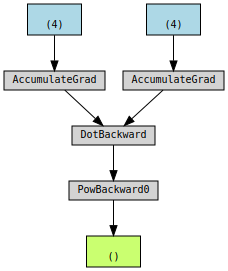

In [17]:
from torchviz import make_dot
make_dot(z)

    
# missing gradients

In [5]:
import torch

print("Trial 1: with python float")
w = torch.randn(3,5,requires_grad = True) * 0.01

x = torch.randn(5,4,requires_grad = True)

y = torch.matmul(w,x).sum(1)

y.backward(torch.ones(3))

print("w.requires_grad:",w.requires_grad)
print("x.requires_grad:",x.requires_grad)

print("w.grad",w.grad)
print("x.grad",x.grad)

Trial 1: with python float
w.requires_grad: True
x.requires_grad: True
w.grad None
x.grad tensor([[ 0.0204,  0.0204,  0.0204,  0.0204],
        [-0.0303, -0.0303, -0.0303, -0.0303],
        [-0.0199, -0.0199, -0.0199, -0.0199],
        [-0.0154, -0.0154, -0.0154, -0.0154],
        [-0.0152, -0.0152, -0.0152, -0.0152]])


/tmp/ipykernel_27814/3876174008.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("w.grad",w.grad)


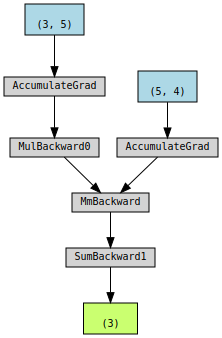

In [3]:
from torchviz import make_dot
make_dot(y)